In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np
from scipy import io
import scipy
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, TimeDistributed, LSTM
import cv2
import imageio
import matplotlib.image as mpimg
from skimage.transform import resize

totalSteps = 20

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
trainDir = "/kaggle/input/perfusion-angiography/archive/Train_Files 2"
cvDir = "/kaggle/input/perfusion-angiography/archive/Cross_Val_Files 2"
testDir = "/kaggle/input/perfusion-angiography/archive/Test_Files 2"

In [19]:
# inputs fileName, key, outputs data 
def data_processing(data, key, resize_bool, size, normBool, timeSteps, strideLength):
    
    # subtract mean and divide by std 
    if (normBool):
        data[key] -= np.mean(data[key], axis=0)
        data[key] = data[key]/np.std(data[key])
    
    # move frames to front if key equals X (time steps are required in front in ConvLstm layer)
    if (key == 'X'):
        data_key = np.moveaxis(data[key], -1, 0)
        
        # timeSteps does not match total DSA time steps (20)
        if (timeSteps != totalSteps):
            data_key_red = np.zeros((timeSteps, size, size))
            m = 0
            for i in range(3, totalSteps-2, strideLength):
                data_key_red[m, :, :] = data_key[i, :, :]
                m += 1
            data_key = data_key_red
                   
        # resize images to desired dimension 
        if (resize_bool):
            for p in range(timeSteps):
                data_key[p, :, :] = resize(data_key[p, :, :], (size, size))
        
        data_key = data_key[np.newaxis,..., np.newaxis]
            
        return data_key 
        
    else:
        data_key = data[key]
        if (resize_bool):
            data_key = resize(data_key, (size, size))

        # add channel dimension 
        data_key = data_key[np.newaxis,..., np.newaxis]

        return data_key

In [20]:
# input number of Files, view(1-4), and directory path 
def file_grabber(numFiles, view, directory, key, resize=False, shape=256, normalize=True, steps=17, stride=1):
    counter = 0 
    for tr in sorted(os.listdir( directory )) :
        fileName = directory + "/" + tr
        if (np.int(fileName[-5]) == view):
            data = io.loadmat(fileName)
            if key in data.keys():
                print(fileName)
                X = data_processing(data, 'X', resize, shape, normalize, steps, stride)
                Y = data_processing(data, key, resize, shape, normalize, steps, stride)
                counter += 1
        else:
            continue
        if (counter == 1):
            X_5D = X
            Y_4D = Y
        else:
            X_5D = np.vstack((X_5D, X))
            Y_4D = np.vstack((Y_4D, Y))
        
        if (counter >= numFiles):
            return X_5D, Y_4D
            break
            
    return X_5D, Y_4D

In [17]:
playX, playY = file_grabber(2, 1, trainDir, 'CBF', steps=17)

/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_001_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_002_DSA_1.mat
(17, 256, 256)


In [18]:
X_train, Y_train = file_grabber(100, 1, trainDir, 'CBF', steps=17)

/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_001_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_002_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_003_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_004_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_005_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_006_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_007_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_008_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_009_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_010_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_

/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_091_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_092_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_093_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_094_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_096_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_097_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_098_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_099_DSA_1.mat
(17, 256, 256)
/kaggle/input/perfusion-angiography/archive/Train_Files 2/patient_100_DSA_1.mat
(17, 256, 256)


In [21]:
print("X_train shape: ", np.shape(X_train))
print("Y_train shape: ", np.shape(Y_train))

X_train shape:  (98, 17, 256, 256, 1)
Y_train shape:  (98, 256, 256, 1)


In [22]:
X_val, Y_val = file_grabber(20, 1, cvDir, 'CBF', steps=17)

/kaggle/input/perfusion-angiography/archive/Cross_Val_Files 2/patient_101_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Cross_Val_Files 2/patient_102_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Cross_Val_Files 2/patient_103_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Cross_Val_Files 2/patient_104_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Cross_Val_Files 2/patient_105_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Cross_Val_Files 2/patient_106_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Cross_Val_Files 2/patient_107_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Cross_Val_Files 2/patient_108_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Cross_Val_Files 2/patient_109_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Cross_Val_Files 2/patient_110_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Cross_Val_Files 2/patient_111_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Cross_Val_Files 2/patient_112_DS

In [23]:
print("X val shape: ", np.shape(X_val))
print("Y val shape: ", np.shape(Y_val))


X val shape:  (20, 17, 256, 256, 1)
Y val shape:  (20, 256, 256, 1)


In [25]:

X_test, Y_test = file_grabber(46, 1, testDir, 'CBF', steps=17)

/kaggle/input/perfusion-angiography/archive/Test_Files 2/patient_121_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Test_Files 2/patient_122_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Test_Files 2/patient_123_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Test_Files 2/patient_124_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Test_Files 2/patient_125_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Test_Files 2/patient_126_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Test_Files 2/patient_127_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Test_Files 2/patient_128_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Test_Files 2/patient_129_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Test_Files 2/patient_130_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Test_Files 2/patient_131_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Test_Files 2/patient_132_DSA_1.mat
/kaggle/input/perfusion-angiography/archive/Test_Fil

In [26]:
print("X test shape: ", np.shape(X_test))
print("Y test shape: ", np.shape(Y_test))

X test shape:  (46, 17, 256, 256, 1)
Y test shape:  (46, 256, 256, 1)


In [27]:
# concatenate train and val sets (this makes it easier to perform k-fold, should have never been seperated
# initially.)
X_total = np.vstack((X_train, X_val, X_test))
Y_total = np.vstack((Y_train, Y_val, Y_test))


print("X train total shape: ", np.shape(X_total))
print("Y train total shape: ", np.shape(Y_total))

X train total shape:  (164, 17, 256, 256, 1)
Y train total shape:  (164, 256, 256, 1)


In [ ]:
# randomly select 30 files from training files (doing k-fold on 118 patients would take too long)
# this is for hyperparam tuning, if doing this do not stack x and y test in cell above 
from sklearn.model_selection import train_test_split
X_split_big, X_split_small, y_split_big, y_split_small = train_test_split(
    X_train_l, Y_train_l, test_size=0.25, random_state=42)

print("X split small: ", np.shape(X_split_small))
print("Y split small: ", np.shape(y_split_small))

In [29]:
# randomly divide full 164 patient set into training and test (this is for complete training)
# This is done by creating 0-163 arrays, selecting a random subset of indices for train and test
# and using those indices to divide the patient dataset 
import random
from sklearn.model_selection import train_test_split
numFiles = 164
test_size = .295
random_state = 42
timeSteps = 17
size = 256 
channels = 1

X = np.arange(numFiles)
y = np.arange(numFiles)

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X,
                                                y,
                                                test_size=test_size,
                                                random_state=random_state)

print("X_train_i size: ", X_train_i.size)
print("X_test_i size: ", X_test_i.size)
print("y_train_i size: ", y_train_i.size)
print("y_test_i size: ", y_test_i.size)

X_train = np.zeros((X_train_i.size, timeSteps, size, size, channels))
y_train = np.zeros((y_train_i.size, size, size, channels))
X_test = np.zeros((X_test_i.size, timeSteps, size, size, channels))
y_test = np.zeros((y_test_i.size, size, size, channels))


i = 0 
for index in X_train_i: 
    X_train[i, :, :, :, :] = X_total[index, :, :, :, :]
    y_train[i, :, :, :] = Y_total[index, :, :, :]
    i += 1
    
m = 0 
for index in X_test_i: 
    X_test[m, :, : ,:, :] = X_total[index, :, :, :, :]
    y_test[m, :, :, : ] = Y_total[index, :, :, :]
    m += 1
    

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
    

X_train_i size:  115
X_test_i size:  49
y_train_i size:  115
y_test_i size:  49
X_train shape:  (115, 17, 256, 256, 1)
y_train shape:  (115, 256, 256, 1)
X_test shape:  (49, 17, 256, 256, 1)
y_test shape:  (49, 256, 256, 1)


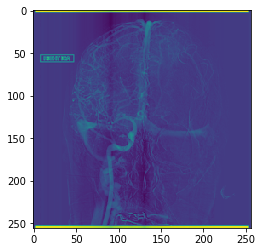

In [30]:
plt.imshow(y_test[10, :, :, -1])

In [31]:
# predict random r value
r = -5
#r = -random.uniform(3, 5)
print(r)


-5


In [32]:
from keras.models import Sequential
from keras import optimizers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import pylab as plt

Train on 92 samples, validate on 23 samples
Epoch 1/45
92/92 [==============================] - 60s 654ms/step - loss: 1.2074 - val_loss: 0.9969

Epoch 00001: val_loss improved from inf to 0.99687, saving model to best_model.h5
Epoch 2/45
92/92 [==============================] - 56s 611ms/step - loss: 0.7800 - val_loss: 0.7305

Epoch 00002: val_loss improved from 0.99687 to 0.73053, saving model to best_model.h5
Epoch 3/45
92/92 [==============================] - 56s 608ms/step - loss: 0.6354 - val_loss: 0.6130

Epoch 00003: val_loss improved from 0.73053 to 0.61300, saving model to best_model.h5
Epoch 4/45
92/92 [==============================] - 56s 608ms/step - loss: 0.5601 - val_loss: 0.5516

Epoch 00004: val_loss improved from 0.61300 to 0.55165, saving model to best_model.h5
Epoch 5/45
92/92 [==============================] - 56s 607ms/step - loss: 0.5107 - val_loss: 0.5093

Epoch 00005: val_loss improved from 0.55165 to 0.50927, saving model to best_model.h5
Epoch 6/45
92/92 [==

92/92 [==============================] - 56s 610ms/step - loss: 0.2915 - val_loss: 0.3108

Epoch 00045: val_loss did not improve from 0.31000


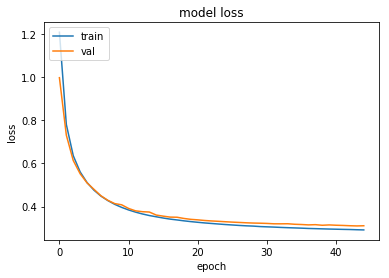

In [34]:
timeSteps = 17

seq = Sequential()
seq.add(ConvLSTM2D(filters=16, kernel_size=(3, 3), strides=1,
                input_shape=(timeSteps, size, size, 1),
                padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=32, kernel_size=(3, 3),
                padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=64, kernel_size=(3, 3),
                padding='same', return_sequences=False))
seq.add(BatchNormalization())

seq.add(Conv2D(filters=1, kernel_size=(3,3),
            activation='relu',
            padding='same', data_format='channels_last'))
    
adam = optimizers.Adam(lr=10**r) # manipulating learning rate
seq.compile(loss='mean_squared_error', optimizer=adam)

# implement early stopping  
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = seq.fit(X_train, y_train, batch_size=1, epochs=45, validation_split=.2, callbacks=[es, mc])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


#seq.evaluate(x=X_test, y=y_test, batch_size=1, verbose=1)

#pred_imgs = seq.predict(X_test)  

#for img in range(41):
#    plt.imshow(pred_imgs[img, :, :, -1])
#    plt.show()
#    plt.imshow(y_test[img, :, :, -1])
#    plt.show()


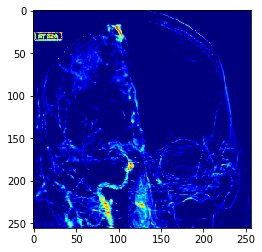

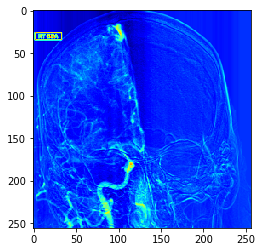

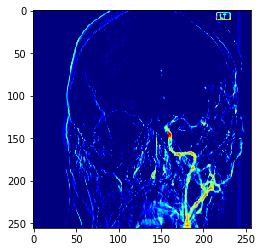

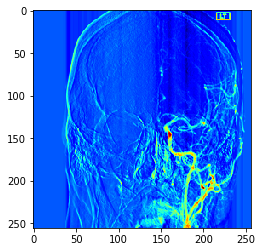

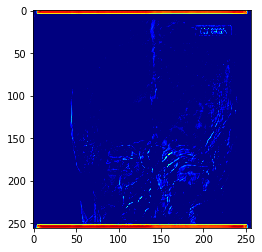

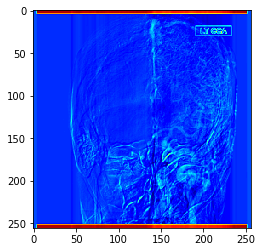

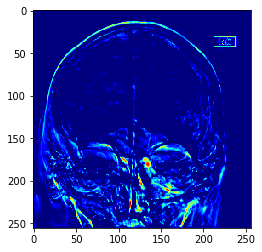

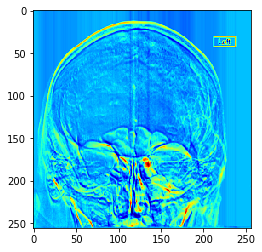

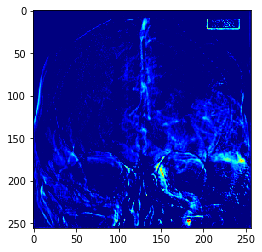

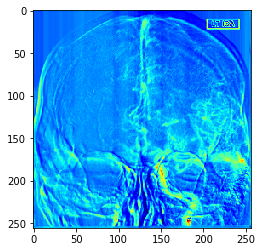

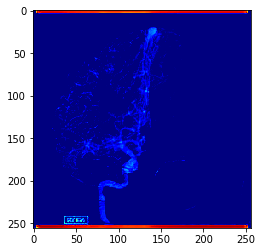

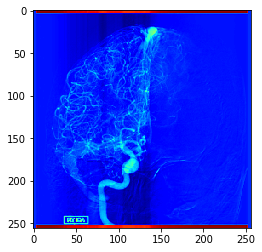

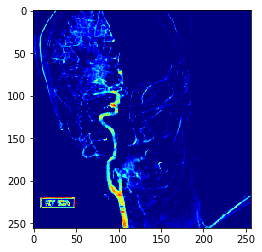

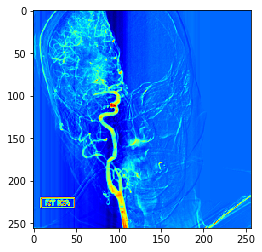

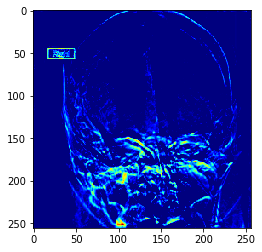

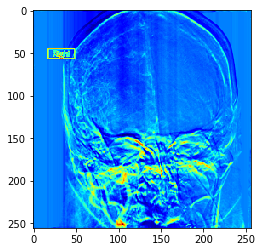

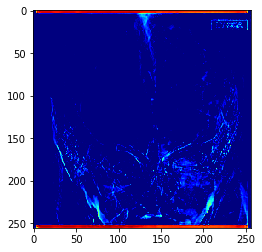

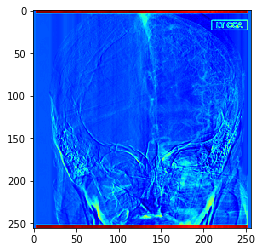

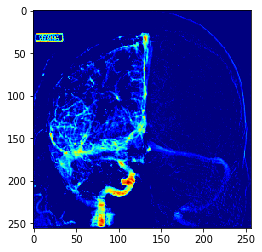

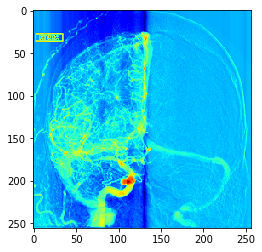

In [35]:
# Results
# First image is prediction
# Second image is provided image (label)
numTrain = 92
numVal = 23
pred_imgs = seq.predict(X_train[numTrain:numTrain + 10, :, :, :, :])  
for img in range(10):
    plt.imshow(pred_imgs[img, :, :, -1], cmap='jet')
    plt.show()
    plt.imshow(y_train[img+numTrain, :, :, -1], cmap='jet')
    plt.show()


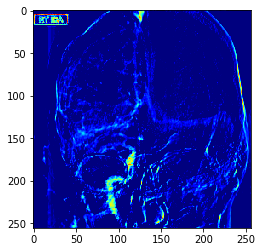

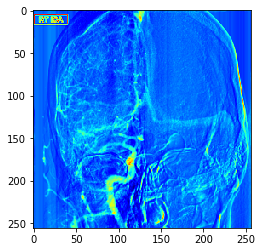

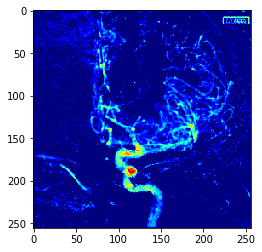

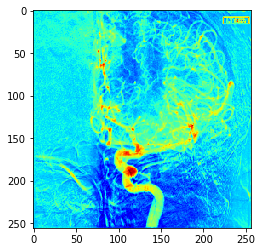

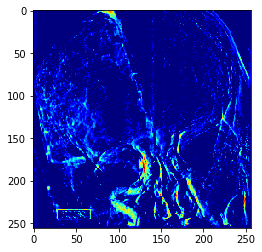

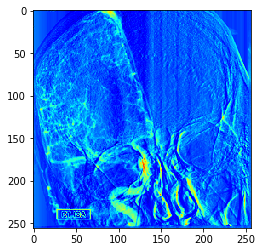

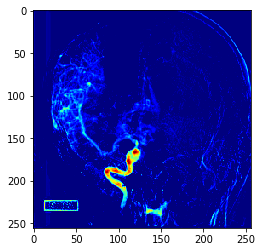

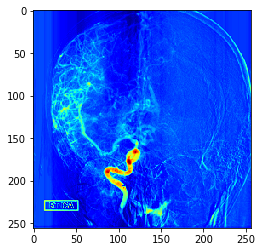

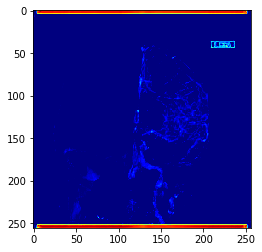

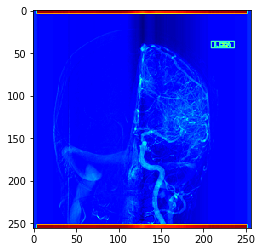

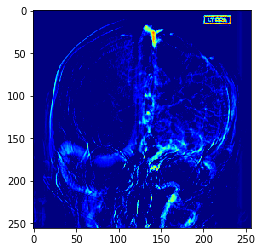

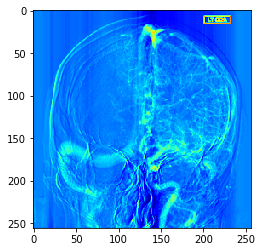

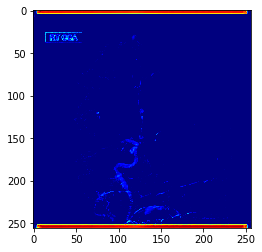

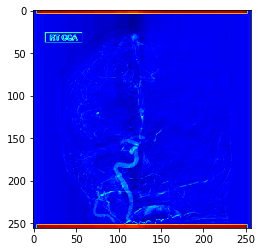

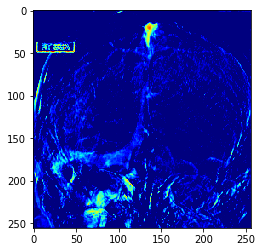

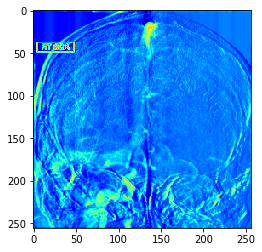

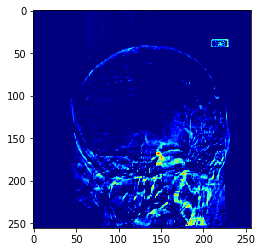

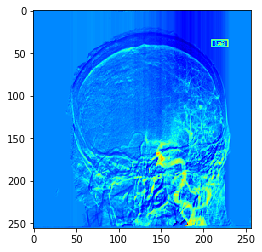

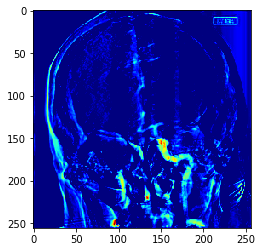

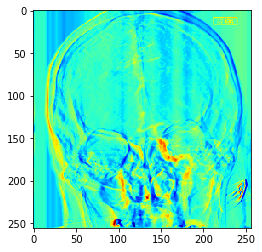

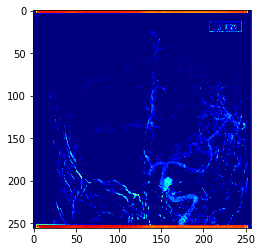

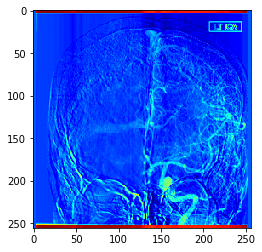

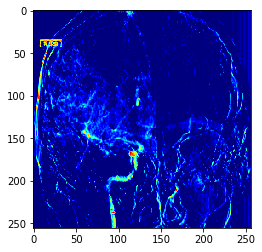

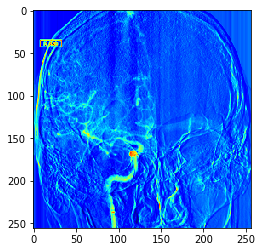

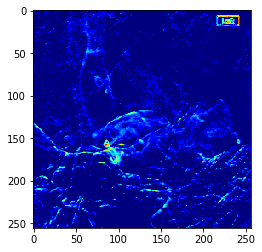

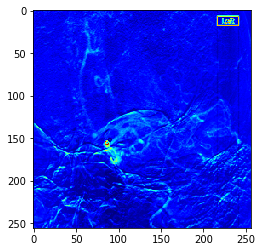

In [37]:
# Results
# First image is prediction
# Second image is provided image (label)
pred_imgs2 = seq.predict(X_train[numTrain+10:numTrain + numVal, :, :, :, :])  
for img in range(13):
    plt.imshow(pred_imgs2[img, :, :, -1], cmap='jet')
    plt.show()
    plt.imshow(y_train[img+numTrain+10, :, :, -1], cmap='jet')
    plt.show()

In [ ]:
# print X val DSA Images 
numTrain = 92
numVal = 23
for img in range(numVal):
    print("------New Image-------")
    for i in range(0, timeSteps):
        plt.imshow(X_train[img+numTrain, i, :, :, -1])
        plt.show()


In [ ]:
# print images without normalizatiomn 
noNorm_X, noNorm_y = file_grabber(2, 1, trainDir, 'CBF')
norm_X, norm_y = file_grabber(2, 1, trainDir, 'CBF', normalize=True)


plt.imshow(noNorm_y[0, :, :, -1])
plt.show()
plt.imshow(norm_y[0, :, :, -1])

#for i in range(20):
    #plt.imshow(noNorm_X[0, i, :, :, -1])
    #plt.show()
    #plt.imshow(norm_X[0, i, :, :, -1])
    #plt.show()
    
    

In [ ]:
# perform splits
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X_split_small)

size = 256
#storage = np.zeros((5, 6, 150, 150, 1))
#p = 0 
    
for train_index, test_index in kf.split(X_split_small):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_k, X_test_k = X_split_small[train_index], X_split_small[test_index]
    y_train_k, y_test_k = y_split_small[train_index], y_split_small[test_index]
    
    seq = Sequential()
    seq.add(ConvLSTM2D(filters=16, kernel_size=(3, 3), strides=1,
                   input_shape=(20, size, size, 1),
                   padding='same', return_sequences=True))
    seq.add(BatchNormalization())

    seq.add(ConvLSTM2D(filters=32, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
    seq.add(BatchNormalization())

    seq.add(ConvLSTM2D(filters=64, kernel_size=(3, 3),
                   padding='same', return_sequences=False))
    seq.add(BatchNormalization())

    seq.add(Conv2D(filters=1, kernel_size=(3,3),
               activation='relu',
               padding='same', data_format='channels_last'))
    
    adam = optimizers.Adam(lr=10**r) # manipulating learning rate
    seq.compile(loss='mean_squared_error', optimizer=adam)
    
    history = seq.fit(X_train_k, y_train_k, batch_size=1, epochs=60, validation_data=(X_test_k, y_test_k))
    
    # display plot for each k fold 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    # predict images
    pred_imgs = seq.predict(X_test_k)
    
    #storage[p, :, :, :, :] = pred_imgs
    
    #p += 1
    
    # plot images and compare to traditional perf angio methods 
    img_1 = pred_imgs[0, :, :, -1]
    img_2 = pred_imgs[1, :, :, -1]
    img_3 = pred_imgs[2, :, :, -1]
    img_4 = pred_imgs[3, :, :, -1]
    img_5 = pred_imgs[4, :, :, -1]
    img_6 = pred_imgs[5, :, :, -1]
    plt.imshow(img_1)
    plt.show()
    plt.imshow(y_test_k[0, :, :, -1])
    plt.show()
    plt.imshow(img_2)
    plt.show()
    plt.imshow(y_test_k[1, :, :, -1])
    plt.show()
    plt.imshow(img_3)
    plt.show()
    plt.imshow(y_test_k[2, :, :, -1])
    plt.show()
    plt.imshow(img_4)
    plt.show()
    plt.imshow(y_test_k[3, :, :, -1])
    plt.show()
    plt.imshow(img_5)
    plt.show()
    plt.imshow(y_test_k[4, :, :, -1])
    plt.show()
    plt.imshow(img_6)
    plt.show()
    plt.imshow(y_test_k[5, :, :, -1])
    plt.show()
    
    

    

In [ ]:
X_val, Y_val = file_grabber(20, 1, cvDir, 'CBF')
print(np.shape(X_val))
print(np.shape(Y_val))

In [ ]:
# concatenate train and val sets (this makes it easier to perform k-fold, should have never been seperated
# initially.)
X_train_l = np.vstack((X_train, X_val))
Y_train_l = np.vstack((Y_train, Y_val))

print("X train total shape: ", np.shape(X_train_l))
print("Y train total shape: ", np.shape(Y_train_l))

In [ ]:
# randomly select 30 files from training files (doing k-fold on 118 patients would take too long)
from sklearn.model_selection import train_test_split
X_split_big, X_split_small, y_split_big, y_split_small = train_test_split(
    X_train_l, Y_train_l, test_size=0.25, random_state=42)

print("X split small: ", np.shape(X_split_small))
print("Y split small: ", np.shape(y_split_small))

In [ ]:
# compute mse for resized and plot resized images against original 256 x 256 images 
splits = 5
images = 6
c = 0 
mse_array = np.zeros((5,6))
for i in range(splits):
    for m in range(images):
        resized_img = resize(storage[i, m, :, :, -1], (256, 256)) 
        y_test_img = y_split_small[c, :, :, -1]
        c += 1
        plt.imshow(resized_img)
        plt.show()
        plt.imshow(y_test_img)
        plt.show()
        mse = (np.square(resized_img - y_test_img)).mean(axis=None)
        mse_array[i, m] = mse
        print(mse)
        

        
    


In [ ]:
print(np.mean(mse_array, axis=1))